<a href="https://colab.research.google.com/github/ALOK158/Neural_Network_TensorFlow/blob/main/Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf


#Introduction to CNN and computer vision

Computer vision is pracrise of writing algorithmms which can discover pattern in visual data.

We are using food101 dataset and modified to get  only pizza and steak

## Get the data

In [3]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2025-01-18 05:37:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.207, 142.250.99.207, 142.250.107.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   205MB/s    in 0.5s    

2025-01-18 05:37:15 (205 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [4]:
#Unzip
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

##Inspect the data( become one with it)

A very crucial step at the beginning of any machine learning project is  becoming one with data


In [5]:
!ls pizza_steak

test  train


In [6]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [7]:
##
import os

# walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directoreis and {len(filenames)} images in '{dirpath}' ")



There are 2 directoreis and 0 images in 'pizza_steak' 
There are 2 directoreis and 0 images in 'pizza_steak/test' 
There are 0 directoreis and 250 images in 'pizza_steak/test/steak' 
There are 0 directoreis and 250 images in 'pizza_steak/test/pizza' 
There are 2 directoreis and 0 images in 'pizza_steak/train' 
There are 0 directoreis and 750 images in 'pizza_steak/train/steak' 
There are 0 directoreis and 750 images in 'pizza_steak/train/pizza' 


In [8]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jan 18 05:37 .
drwxr-xr-x 1 root root 4096 Jan 18 05:37 ..
drwxr-xr-x 4 root root 4096 Jan 18 05:37 test
drwxr-xr-x 4 root root 4096 Jan 18 05:37 train


In [9]:
##Another way to find out many images are in file

num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [10]:
#get the classname programmati
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [11]:
#Lets visualize it
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape:{img.shape}")
  return img

Image shape:(512, 512, 3)


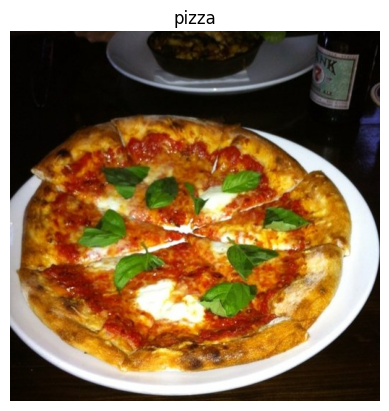

In [12]:
#view the random image from traininig dataset
img=view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

In [13]:
# view the image shape
img.shape  #returns width, height , colour channels

(512, 512, 3)

In [14]:
# get all pixel values in range 0-1
img/255.

array([[[0.05882353, 0.04313725, 0.03137255],
        [0.05882353, 0.04313725, 0.03137255],
        [0.0627451 , 0.04705882, 0.03529412],
        ...,
        [0.01568627, 0.01176471, 0.00392157],
        [0.01568627, 0.01176471, 0.00392157],
        [0.01568627, 0.01176471, 0.00392157]],

       [[0.05882353, 0.04313725, 0.03137255],
        [0.05882353, 0.04313725, 0.03137255],
        [0.05882353, 0.04313725, 0.03137255],
        ...,
        [0.01568627, 0.01176471, 0.00392157],
        [0.01568627, 0.01176471, 0.00392157],
        [0.01568627, 0.01176471, 0.00392157]],

       [[0.05490196, 0.03921569, 0.02745098],
        [0.05490196, 0.03921569, 0.02745098],
        [0.05882353, 0.04313725, 0.03137255],
        ...,
        [0.01568627, 0.01176471, 0.00392157],
        [0.01568627, 0.01176471, 0.00392157],
        [0.01568627, 0.01176471, 0.00392157]],

       ...,

       [[0.04313725, 0.02352941, 0.        ],
        [0.04313725, 0.02352941, 0.        ],
        [0.04313725, 0

**Note** -All neural network model works much better if they input values between 0-1. This can be achieved by noromalization.
Dividing pixl values of image by 255 as it is max pixel value


## Lets have our CNN model
Things to be care of

*Load our images
*Preprocess the image
*


In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#Preprocess data to get all pixel values between 0 and 1
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen= ImageDataGenerator(rescale=1./255)

#setup path to get our data directories

test_dir="/content/pizza_steak/test"
train_dir="/content/pizza_steak/train"


#Import datas from directories and turn them into batches

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                   batch_size=32,
                                   target_size=(224,224),
                                   class_mode="binary", ## as we are working with tow classes
                                   seed=42)## default value, 224 always hold good amount of info still
valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

##build the CNN model-can cehck tiny VGG on CNN explainer website
model_1=tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=10,
                               kernel_size=3,
                               activation="relu",
                               input_shape=(224,224,3)),
        tf.keras.layers.Conv2D(10,3,activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2,
                                  padding="valid"),
        tf.keras.layers.Conv2D(10,3,activation="relu"),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile our cnn
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
 #fit the model
history_1=model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
            )




Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.6077 - loss: 0.6450 - val_accuracy: 0.8180 - val_loss: 0.4315
Epoch 2/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 234ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8180 - val_loss: 0.4315
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.7676 - loss: 0.4668 - val_accuracy: 0.7880 - val_loss: 0.4482
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 359ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7880 - val_loss: 0.4482
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 118s 3s/step - accuracy: 0.8172 - loss: 0.4327 - val_accuracy: 0.8640 - val_loss: 0.3364


Check out-**CNN-Explainer** website

In [17]:
len(train_data)
1500/32#beacuse we have batch size of 32 ->so that whole donot load up at once and carry up whole space

46.875

<Axes: >

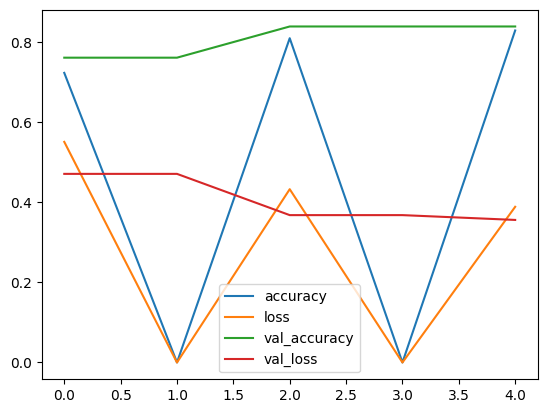

In [16]:
 import pandas as pd
 pd.DataFrame(history_1.history).plot()

In [23]:
model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 29160)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │          29,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,785 (366.35 KB)

 Trainable params: 31,261 (122.11 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,524 (244.24 KB)

##Using the same model as before

Lets replicate a model we have buil earlier to see if it works

That is from tensorflow playground

In [27]:
#set random seed
tf.random.set_seed(42)

#create model to replicate tensordlow playgroubd

model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 255ms/step - accuracy: 0.4779 - loss: 1.4905 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 117ms/step - accuracy: 0.4894 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - accuracy: 0.4942 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
